# Original Paper
https://arxiv.org/pdf/1508.06576.pdf

layer names: https://www.robots.ox.ac.uk/~vgg/publications/2016/Mahendran16/mahendran16.pdf

# Install Keras

$pip install git+https://github.com/fchollet/keras.git

# Image preprocessing inputs

In [2]:
from PIL import Image
import numpy as np

# Load Images

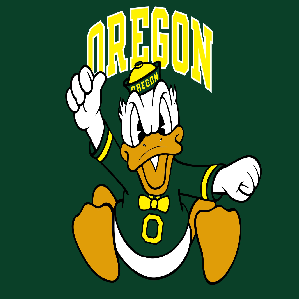

In [4]:
im = Image.open('duck.jpg')
im2 = im.resize([299,299])
style = np.array(im2).reshape((1,299,299,3))
im2

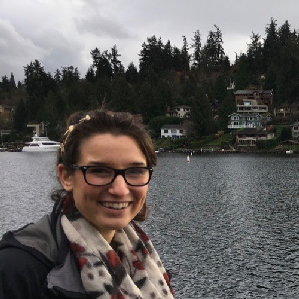

In [5]:
im = Image.open('IMG_8180.jpg')
im2 = im.crop(box=[0,0,500,500])
im2 = im2.resize([299,299])
alter = np.array(im2).reshape([1,299,299,3])
im2

# Keras imports

In [6]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, BatchNormalization, Activation, merge
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D

Using TensorFlow backend.


# Build Keras model

In [7]:
input_shape=(None, None, 3)
input_tensor=Input(shape=input_shape)

In [8]:
img_input = Input(tensor=input_tensor, shape=input_shape)
x = Conv2D(32, 3, 3, subsample=(2, 2), bias=False, name='block1_conv1')(img_input)
x = BatchNormalization(name='block1_conv1_bn')(x)
x = Activation('relu', name='block1_conv1_act')(x)
x = Conv2D(64, 3, 3, bias=False, name='block1_conv2')(x)
x = BatchNormalization(name='block1_conv2_bn')(x)
x = Activation('relu', name='block1_conv2_act')(x)

residual = Conv2D(128, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv1')(x)
x = BatchNormalization(name='block2_sepconv1_bn')(x)
x = Activation('relu', name='block2_sepconv2_act')(x)
x = SeparableConv2D(128, 3, 3, border_mode='same', bias=False, name='block2_sepconv2')(x)
x = BatchNormalization(name='block2_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block2_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(256, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block3_sepconv1_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv1')(x)
x = BatchNormalization(name='block3_sepconv1_bn')(x)
x = Activation('relu', name='block3_sepconv2_act')(x)
x = SeparableConv2D(256, 3, 3, border_mode='same', bias=False, name='block3_sepconv2')(x)
x = BatchNormalization(name='block3_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block3_pool')(x)
x = merge([x, residual], mode='sum')

residual = Conv2D(728, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block4_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv1')(x)
x = BatchNormalization(name='block4_sepconv1_bn')(x)
x = Activation('relu', name='block4_sepconv2_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block4_sepconv2')(x)
x = BatchNormalization(name='block4_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block4_pool')(x)
x = merge([x, residual], mode='sum')

for i in range(8):
    residual = x
    prefix = 'block' + str(i + 5)

    x = Activation('relu', name=prefix + '_sepconv1_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv1')(x)
    x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv2_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv2')(x)
    x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
    x = Activation('relu', name=prefix + '_sepconv3_act')(x)
    x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name=prefix + '_sepconv3')(x)
    x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

    x = merge([x, residual], mode='sum')

residual = Conv2D(1024, 1, 1, subsample=(2, 2),
                  border_mode='same', bias=False)(x)
residual = BatchNormalization()(residual)

x = Activation('relu', name='block13_sepconv1_act')(x)
x = SeparableConv2D(728, 3, 3, border_mode='same', bias=False, name='block13_sepconv1')(x)
x = BatchNormalization(name='block13_sepconv1_bn')(x)
x = Activation('relu', name='block13_sepconv2_act')(x)
x = SeparableConv2D(1024, 3, 3, border_mode='same', bias=False, name='block13_sepconv2')(x)
x = BatchNormalization(name='block13_sepconv2_bn')(x)

x = MaxPooling2D((3, 3), strides=(2, 2), border_mode='same', name='block13_pool')(x)
x = merge([x, residual], mode='sum')

x = SeparableConv2D(1536, 3, 3, border_mode='same', bias=False, name='block14_sepconv1')(x)
x = BatchNormalization(name='block14_sepconv1_bn')(x)
x = Activation('relu', name='block14_sepconv1_act')(x)

x = SeparableConv2D(2048, 3, 3, border_mode='same', bias=False, name='block14_sepconv2')(x)
x = BatchNormalization(name='block14_sepconv2_bn')(x)
x = Activation('relu', name='block14_sepconv2_act')(x)

model = Model(img_input, x, name='xception')

#load weights
model.load_weights('/Users/tmulc/Desktop/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Train on the last layer

In [9]:
target = model.predict(style)

In [10]:
target.shape

(1, 10, 10, 2048)

# Create a new graph and add loss

https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html

In [11]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [12]:
ph = K.variable(alter)
ph_out = model(ph)
loss = K.sum(K.square(ph_out-target))
grad_op = K.gradients(loss,ph)

In [13]:
init = tf.initialize_all_variables()

In [14]:
sess.run(init)

In [15]:
derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
derivates.shape

(1, 299, 299, 3)

WOOT WOOT! Now let's make adjustments to the image

In [19]:
step_size = 10

In [20]:
alter = alter-step_size*derivates

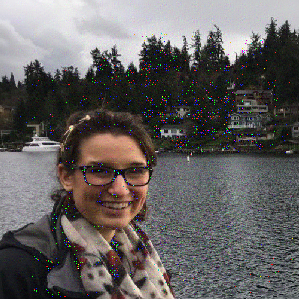

In [21]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))

# training loop

In [22]:
ph_in = K.placeholder(shape=(1,299,299,3))
ph = K.variable(ph_in)
ph_out = model(ph)
loss = K.sum(K.square(ph_out-target))
grad_op = K.gradients(loss,ph)

In [23]:
init = tf.initialize_all_variables()

In [19]:
train_iter=0

In [ ]:
step_size = 5
num_steps = 100
for i in range(num_steps):
    sess.run([init],feed_dict={ph_in:alter})
    derivates = sess.run(grad_op,feed_dict={K.learning_phase(): 1})[0]
    alter = alter-step_size*derivates
    
    #save the image every 20 steps
    if i % 20 == 0:
        train_iter+=1
        Image.fromarray(np.uint8(alter.reshape(299,299,3))).save('Dreams/dream_'+str(train_iter)+'.jpg')

In [ ]:
Image.fromarray(np.uint8(alter.reshape(299,299,3)))